# Map of Detroit Rivers

In [293]:
import geopandas as gpd
import matplotlib.pyplot as plt

# read the shp file of Detroit river
detroit_river = gpd.read_file("../data/maps/detroit_river_aoc_shapefile/AOC_MI_Detroit_2021.shp")

# check the attributes of the data
print(detroit_river.columns)
print(detroit_river)
print("The Coordinate Reference System (CRS) is:", detroit_river.crs)

Index(['Name', 'State', 'geometry'], dtype='object')
                Name State                                           geometry
0  Detroit River AOC    MI  POLYGON ((-82.95739 42.36314, -82.9572 42.3628...
The Coordinate Reference System (CRS) is: EPSG:4269


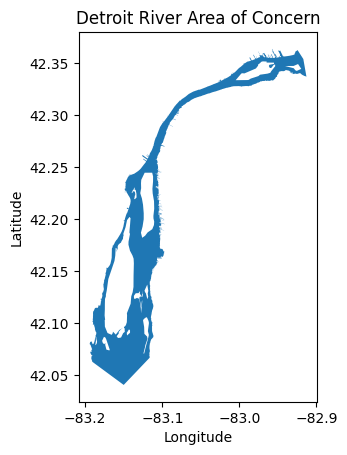

In [20]:
# visualize the detriot river
fig, ax = plt.subplots(dpi = 100)
detroit_river.plot(ax = ax)
ax.set_title("Detroit River Area of Concern")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

In [294]:
# read the environmental data and visualize the sampling points
env_data = gpd.read_file("../data/environmental_data.csv")
env_data.head()

# create the Geometry column from the latitude and longitude
env_data['geometry'] = gpd.points_from_xy(env_data['Longitude'], env_data['Latitude'])
env_data = gpd.GeoDataFrame(env_data, geometry='geometry')
env_data.head()

,Site ID,Location,Latitude,Longitude,Total Organic Carbon (LOI %),Water Depth (m),Water Temperature (°C),Dissolved Oxygen Concentration (mg/L),Median Particle Size (Phi),geometry
0,027B,DR,42.33,-83.03,1.7,11.58,12.15,9.2,2.42,POINT (-83.03 42.33)
1,029C,DR,42.31,-83.08,1.39,9.14,14.4,10.5,1.22,POINT (-83.08 42.31)
2,030ABC,DR,42.32,-83.06,1.81,11.89,16.66,9.18,0.92,POINT (-83.06 42.32)
3,031A,DR,42.32,-83.05,6.67,12.5,12.04,9.36,-0.16,POINT (-83.05 42.32)
4,033ABC,DR,42.29,-83.09,1.45,9.14,19.13,6.55,1.1,POINT (-83.09 42.29)


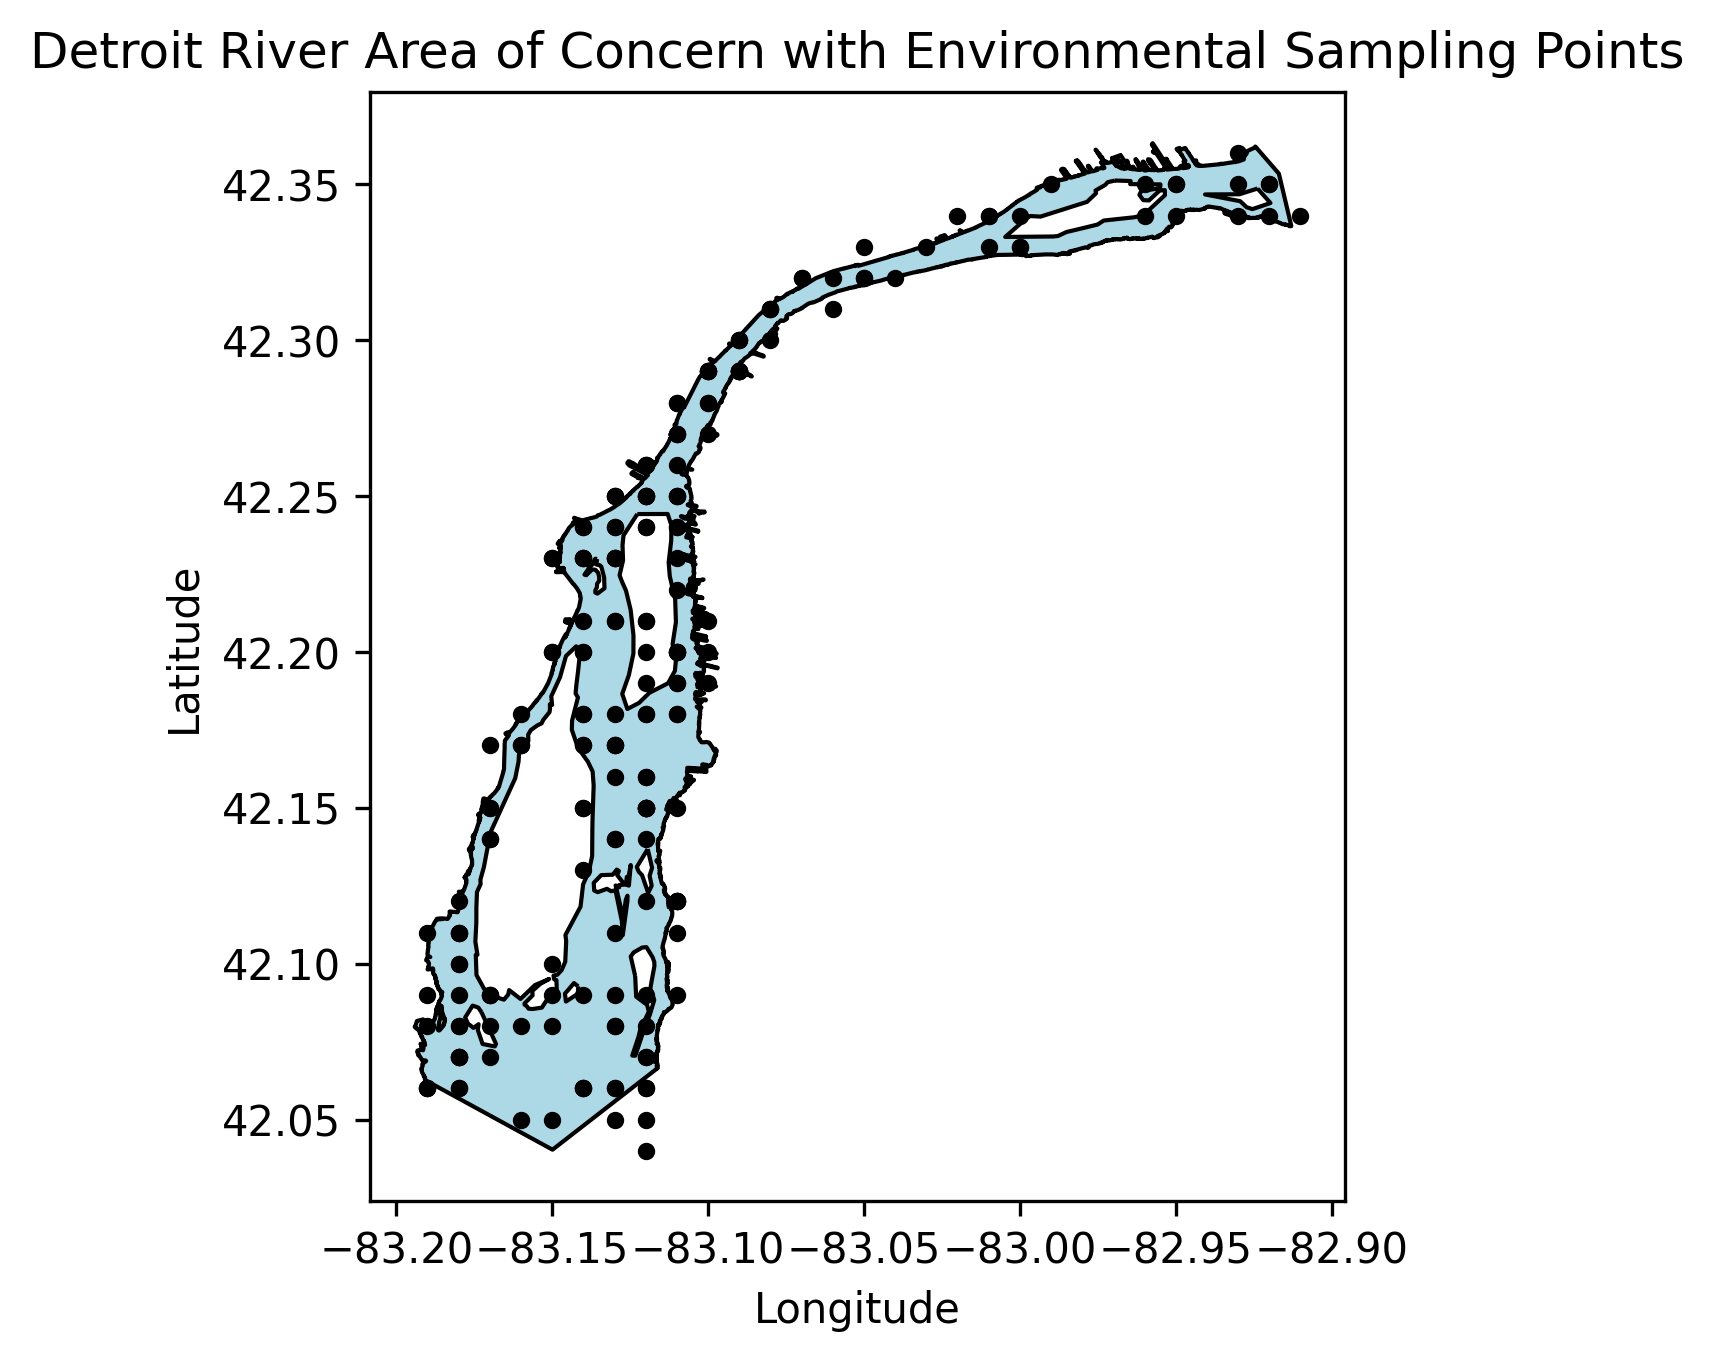

In [39]:
from scipy.stats import gaussian_kde
import numpy as np

# visualize the geometry of the environmental data in the same plot
fig, ax = plt.subplots(dpi = 300)
detroit_river.plot(ax = ax, color='lightblue', edgecolor='black')

# Extract coordinates of sampling points
coords = np.array([(geom.x, geom.y) for geom in env_data.geometry])

# Perform kernel density estimation
kde = gaussian_kde(coords.T)
xmin, ymin, xmax, ymax = detroit_river.total_bounds
xx, yy = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([xx.ravel(), yy.ravel()])
density = kde(positions).reshape(xx.shape)

# Plot density as a contourf
# ax.contourf(xx, yy, density, levels=20, cmap='hot', alpha=0.6)
env_data.plot(ax=ax, color='black', markersize=10)

ax.set_title("Detroit River Area of Concern with Environmental Sampling Points")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

# Complete the whole map of the corridor

In [295]:
world_lakes = gpd.read_file("../data/maps/ne_10m_lakes/ne_10m_lakes.shp")
lake_stclair = world_lakes[world_lakes['name'] == 'Lake Saint Clair']
lake_erie = world_lakes[world_lakes['name'] == 'Lake Erie']
river_stclair = gpd.read_file("../data/maps/aoc_mi_stclair_2021/AOC_MI_StClair_2021.shp")
lake_huron = world_lakes[world_lakes['name'] == 'Lake Huron']

# save the lakes to a new shapefile
# lake_stclair.to_file("../data/maps/lake_stclair.shp")
# lake_erie.to_file("../data/maps/lake_erie.shp")
# lake_huron.to_file("../data/maps/lake_huron/lake_huron.shp")

In [287]:
# a function to quickly plot the Detroit River with adjacent lakes
def plot_rivers_lakes(ax = None, annotating = False):
    """Plot the Detroit River with adjacent lakes."""
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
        
    # read the two shape files of the lakes
    lake_stclair = gpd.read_file("../data/maps/lake_stclair/lake_stclair.shp")
    lake_erie = gpd.read_file("../data/maps/lake_erie/lake_erie.shp")
    detroit_river = gpd.read_file("../data/maps/detroit_river_aoc_shapefile/AOC_MI_Detroit_2021.shp")
    stclair_river = gpd.read_file("../data/maps/aoc_mi_stclair_2021/AOC_MI_StClair_2021.shp")
    lake_huron = gpd.read_file("../data/maps/lake_huron/lake_huron.shp")
    
    # plot the Detroit River and the lakes
    lake_stclair.plot(ax=ax, color='lightblue', edgecolor='none', alpha=0.5)
    lake_erie.plot(ax=ax, color='lightblue', edgecolor='none', alpha=0.5)
    lake_huron.plot(ax=ax, color='lightblue', edgecolor='none', alpha=0.5)
    detroit_river.plot(ax=ax, color='lightblue', edgecolor='none')
    stclair_river.plot(ax=ax, color='lightblue', edgecolor='none')
    ax.set_title("The Huron-Erie Corridor")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    # ax.set_ylim(42, 43.2)  # Set y-limits to focus on North America
    # ax.set_xlim(-83.3, -82.3)  # Set x-limits to focus on North America
    
    # if annotating are True, annotate the rivers and lakes
    if annotating == True:
        # annotate the rivers and lakes 
        ax.annotate(
            'Detroit River',
            xy=(-83.1, 42.3),
            xytext=(-83.28, 42.4),
            arrowprops=dict(arrowstyle='->', linewidth=1, color='black'),
            fontsize=8,
            color='blue',
            weight='bold'
        )
        ax.text(-82.85, 42.42, 'Lake Saint Clair', fontsize=8, color = 'blue', weight='bold')
        ax.annotate(
            "Staint Clair River",
            xy=(-82.5, 42.8),
            xytext=(-82.95, 42.9),
            arrowprops=dict(arrowstyle='->', linewidth=1, color='black'),
            fontsize=8,
            color='blue',
            weight='bold'
        )
        ax.text(-82.55, 42.05, 'Lake Erie', fontsize=8, color = 'gray', style='italic') 
        ax.text(-82.65, 43.1, 'Lake Huron', fontsize=8, color = 'gray', style='italic')
    return fig, ax

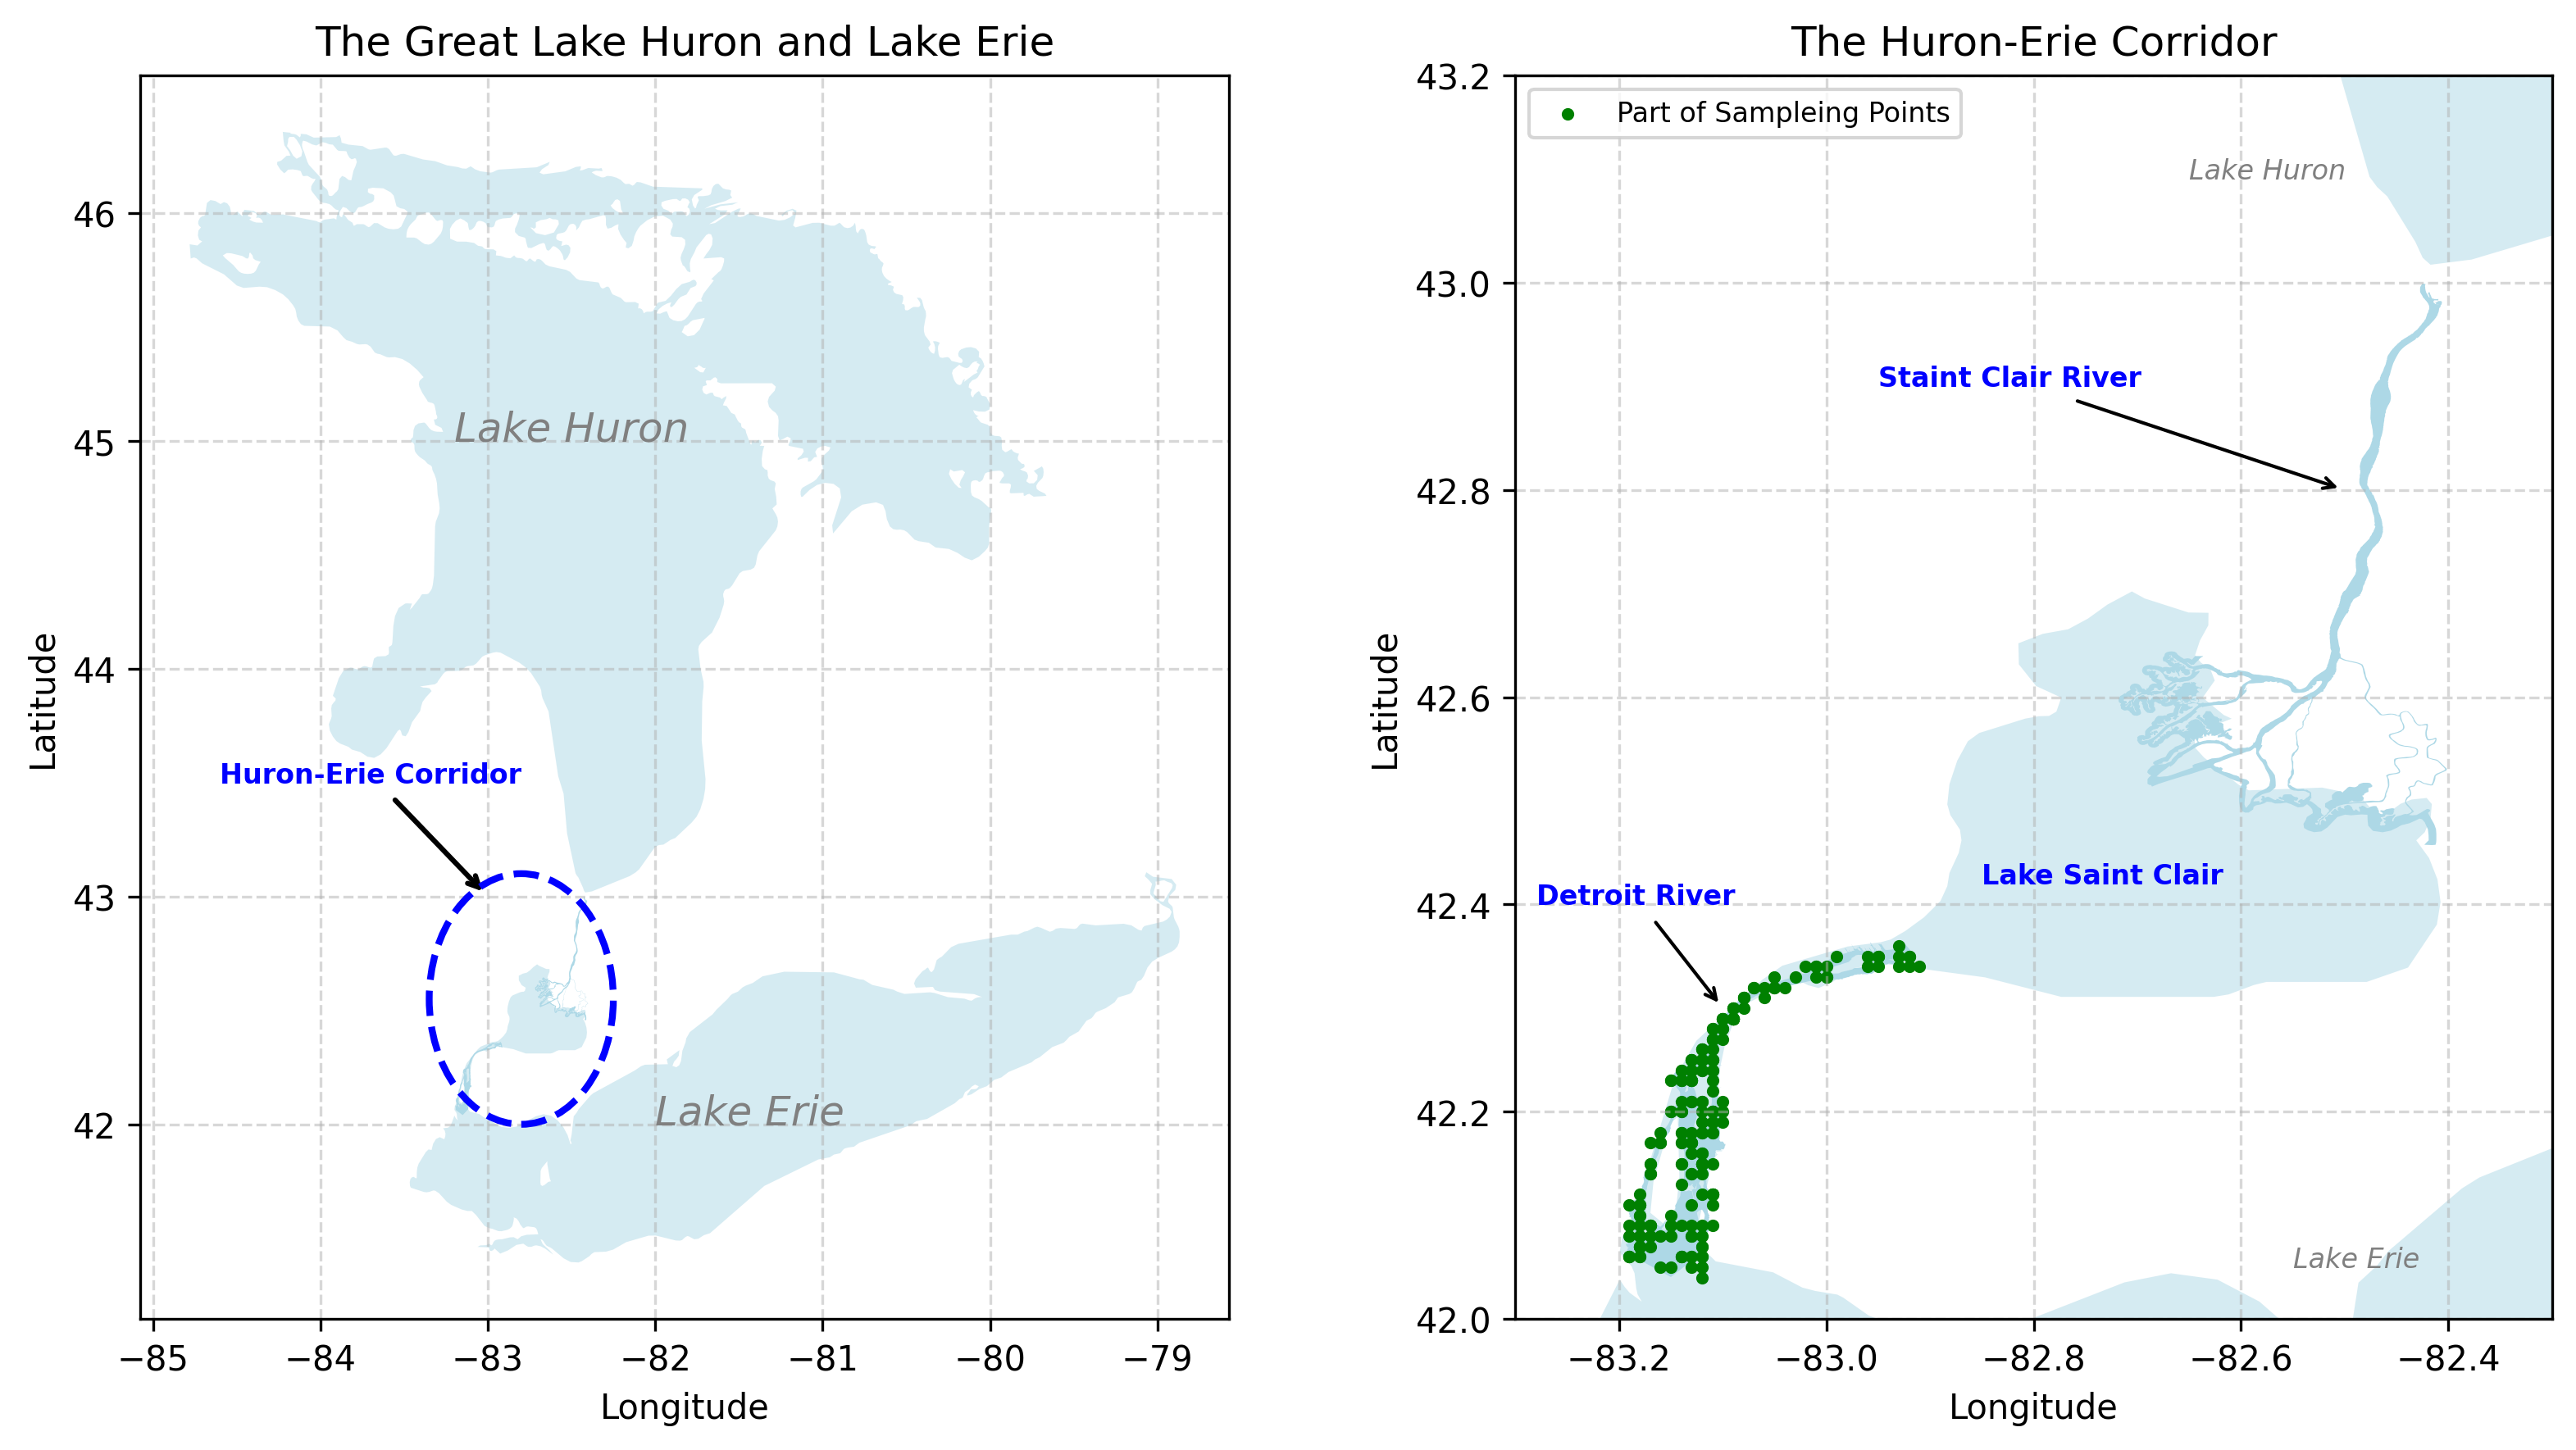

In [299]:
from matplotlib.patches import Circle

# test the function
fig, axes = plt.subplots(1, 2, figsize=(11, 6), dpi=300)
# flatten the axes for easy indexing
axes = axes.flatten()

# enrich the great lakes map
fig, ax1 = plot_rivers_lakes(ax = axes[0], annotating = False)

# Define the center and radius of the circle (approximate for the corridor)
lake_st_clair_center = (-82.8, 42.55)
radius = 0.55  # degrees, adjust as needed for visual fit
circle = Circle(lake_st_clair_center, radius, 
                edgecolor='blue', facecolor='none', linewidth=2, linestyle='--',
                zorder=10)
ax1.add_patch(circle)
ax1.annotate("Huron-Erie Corridor", xy=(-83, 43), xytext=(-84.6, 43.5),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
            fontsize=8, color='blue', weight='bold')

# annotate the two greak lakes
ax1.text(-82, 42, 'Lake Erie', fontsize=12, color = 'gray', style='italic')
ax1.text(-83.2, 45, 'Lake Huron', fontsize=12, color = 'gray', style='italic')
ax1.set_title("The Great Lake Huron and Lake Erie")
ax1.grid(True, linestyle='--', alpha=0.5)

# enrich the Huron-Erie corridor map
fig, ax2 = plot_rivers_lakes(ax = axes[1], annotating = True)
env_data.plot(ax=ax2, color='green', markersize=7, label = "Part of Sampleing Points")
ax2.set_ylim(42, 43.2)  # Set y-limits to focus on North America
ax2.set_xlim(-83.3, -82.3)  # Set x-limits to focus on North America
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend(loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig("../results/map_of_huron_erie_corridor.png", dpi=300)